# Imports

In [129]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [130]:
year = 2022
gp_round = 1
ses = 'R'

In [131]:
driver_1 = 'VER'
driver_2 = 'HAM'

In [132]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


In [133]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True


In [134]:
results = session.results

In [135]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-03-20 16:30:01.137,0 days 02:29:01.120000,,NaN,0 days 00:00:00,11301,280,7,100,False,1,interpolation,0.046505,0.000009,OnTrack,-372,1305,-151
3,2022-03-20 16:30:01.200,0 days 02:29:01.183000,,NaN,0 days 00:00:00.063000,11321,281,7,100,False,1,pos,4.982442,0.000929,OnTrack,-375,1379,-159
4,2022-03-20 16:30:01.322,0 days 02:29:01.305000,,NaN,0 days 00:00:00.185000,11361,282,7,100,False,1,car,14.566667,0.002717,OnTrack,-369,1498,-159
5,2022-03-20 16:30:01.522,0 days 02:29:01.505000,,NaN,0 days 00:00:00.385000,11439,284,7,100,False,1,car,30.344444,0.005661,OnTrack,-362,1657,-159
6,2022-03-20 16:30:01.600,0 days 02:29:01.583000,,NaN,0 days 00:00:00.463000,11462,284,7,100,False,1,pos,36.509060,0.006811,OnTrack,-360,1709,-159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2022-03-20 16:31:35.243,0 days 02:30:35.226000,,NaN,0 days 00:01:34.106000,11200,278,7,100,False,1,car,5323.129444,0.993048,OnTrack,-396,953,-159
704,2022-03-20 16:31:35.361,0 days 02:30:35.344000,,NaN,0 days 00:01:34.224000,11257,278,7,100,False,1,pos,5332.266634,0.994752,OnTrack,-389,1088,-159
705,2022-03-20 16:31:35.483,0 days 02:30:35.466000,,NaN,0 days 00:01:34.346000,11314,279,7,100,False,1,car,5341.729444,0.996518,OnTrack,-385,1159,-158
706,2022-03-20 16:31:35.641,0 days 02:30:35.624000,,NaN,0 days 00:01:34.504000,11326,279,7,100,False,1,pos,5354.010670,0.998809,OnTrack,-383,1213,-159


In [136]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:01:03.204000,25.6,17.0,1010.2,False,32.3,346,0.5
1,0 days 00:02:03.202000,25.7,17.0,1010.2,False,32.3,347,0.6
2,0 days 00:03:03.205000,25.7,17.0,1010.0,False,32.2,359,0.4
3,0 days 00:04:03.220000,25.7,17.0,1010.2,False,32.2,8,0.4
4,0 days 00:05:03.218000,25.6,17.0,1010.0,False,32.1,16,0.5
...,...,...,...,...,...,...,...,...
158,0 days 02:39:03.722000,22.4,36.0,1010.7,False,26.3,243,0.3
159,0 days 02:40:03.752000,22.3,36.0,1010.7,False,26.3,203,0.2
160,0 days 02:41:03.740000,22.3,35.0,1010.7,False,26.3,225,0.1
161,0 days 02:42:03.720000,22.3,35.0,1010.7,False,26.3,232,0.3


In [137]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[10:-3])
        
    return t_list_str

In [138]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [139]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])
# t_list_lec = format_time(t_lec)
# t_list_msc = format_time(t_msc)

In [140]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [141]:
ref_tel

,Date,SessionTime,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,Distance
0,2022-03-20 16:30:01.985,0 days 02:29:01.968000,11309,284,7,100,False,1,interpolation,0 days 00:00:00,0.000000
1,2022-03-20 16:30:02.083,0 days 02:29:02.066000,11315,285,7,100,False,1,car,0 days 00:00:00.098000,7.758333
2,2022-03-20 16:30:02.283,0 days 02:29:02.266000,11396,286,7,100,False,1,car,0 days 00:00:00.298000,23.647222
3,2022-03-20 16:30:02.523,0 days 02:29:02.506000,11462,288,7,100,False,1,car,0 days 00:00:00.538000,42.847222
4,2022-03-20 16:30:02.683,0 days 02:29:02.666000,11520,289,7,100,False,1,car,0 days 00:00:00.698000,55.691667
...,...,...,...,...,...,...,...,...,...,...,...
351,2022-03-20 16:31:36.403,0 days 02:30:36.386000,11059,274,7,100,False,1,car,0 days 00:01:34.418000,5284.808611
352,2022-03-20 16:31:36.643,0 days 02:30:36.626000,11059,278,7,100,False,1,car,0 days 00:01:34.658000,5303.341944
353,2022-03-20 16:31:37.043,0 days 02:30:37.026000,11196,281,7,100,False,1,car,0 days 00:01:35.058000,5334.564167
354,2022-03-20 16:31:37.203,0 days 02:30:37.186000,11319,283,7,100,False,1,car,0 days 00:01:35.218000,5347.141944


In [142]:
hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
fig.show()

In [143]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Gear", row=2, col=1)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
fig.show()

In [144]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:52.109000,16,0 days 00:01:37.853000,2,1,NaT,NaT,0 days 00:00:31.582000,0 days 00:00:42.159000,0 days 00:00:24.112000,0 days 01:04:45.838000,0 days 01:05:27.997000,0 days 01:05:52.109000,226.0,250.0,273.0,284.0,False,SOFT,2.0,True,0 days 01:04:14.256000,Ferrari,LEC,1,True,2022-03-20 15:05:14.273
2,0 days 01:07:30.381000,16,0 days 00:01:38.272000,3,1,NaT,NaT,0 days 00:00:31.635000,0 days 00:00:42.404000,0 days 00:00:24.233000,0 days 01:06:23.744000,0 days 01:07:06.148000,0 days 01:07:30.381000,227.0,252.0,273.0,289.0,False,SOFT,3.0,True,0 days 01:05:52.109000,Ferrari,LEC,1,True,2022-03-20 15:06:52.126
3,0 days 01:09:08.795000,16,0 days 00:01:38.414000,4,1,NaT,NaT,0 days 00:00:31.619000,0 days 00:00:42.482000,0 days 00:00:24.313000,0 days 01:08:02,0 days 01:08:44.482000,0 days 01:09:08.795000,228.0,250.0,273.0,290.0,False,SOFT,4.0,True,0 days 01:07:30.381000,Ferrari,LEC,1,True,2022-03-20 15:08:30.398
4,0 days 01:10:47.266000,16,0 days 00:01:38.471000,5,1,NaT,NaT,0 days 00:00:31.590000,0 days 00:00:42.565000,0 days 00:00:24.316000,0 days 01:09:40.385000,0 days 01:10:22.950000,0 days 01:10:47.266000,229.0,253.0,273.0,289.0,False,SOFT,5.0,True,0 days 01:09:08.795000,Ferrari,LEC,1,True,2022-03-20 15:10:08.812
5,0 days 01:12:25.978000,16,0 days 00:01:38.712000,6,1,NaT,NaT,0 days 00:00:31.627000,0 days 00:00:42.652000,0 days 00:00:24.433000,0 days 01:11:18.893000,0 days 01:12:01.545000,0 days 01:12:25.978000,228.0,252.0,273.0,290.0,False,SOFT,6.0,True,0 days 01:10:47.266000,Ferrari,LEC,1,True,2022-03-20 15:11:47.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,0 days 02:09:55.703000,10,0 days 00:01:38.204000,40,3,NaT,NaT,0 days 00:00:31.492000,0 days 00:00:42.613000,0 days 00:00:24.099000,0 days 02:08:48.991000,0 days 02:09:31.604000,0 days 02:09:55.703000,231.0,253.0,277.0,NaN,False,HARD,9.0,True,0 days 02:08:17.499000,AlphaTauri,GAS,1,True,2022-03-20 16:09:17.516
1119,0 days 02:11:34.004000,10,0 days 00:01:38.301000,41,3,NaT,NaT,0 days 00:00:31.523000,0 days 00:00:42.621000,0 days 00:00:24.157000,0 days 02:10:27.226000,0 days 02:11:09.847000,0 days 02:11:34.004000,232.0,248.0,277.0,299.0,False,HARD,10.0,True,0 days 02:09:55.703000,AlphaTauri,GAS,1,True,2022-03-20 16:10:55.720
1120,0 days 02:13:12.333000,10,0 days 00:01:38.329000,42,3,NaT,NaT,0 days 00:00:31.453000,0 days 00:00:42.692000,0 days 00:00:24.184000,0 days 02:12:05.457000,0 days 02:12:48.149000,0 days 02:13:12.333000,231.0,251.0,277.0,297.0,False,HARD,11.0,True,0 days 02:11:34.004000,AlphaTauri,GAS,1,True,2022-03-20 16:12:34.021
1121,0 days 02:14:50.811000,10,0 days 00:01:38.478000,43,3,NaT,NaT,0 days 00:00:31.468000,0 days 00:00:42.816000,0 days 00:00:24.194000,0 days 02:13:43.801000,0 days 02:14:26.617000,0 days 02:14:50.811000,232.0,250.0,276.0,296.0,False,HARD,12.0,True,0 days 02:13:12.333000,AlphaTauri,GAS,1,True,2022-03-20 16:14:12.350


In [145]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry

In [146]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^']
}

In [147]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
px = 1/plt.rcParams['figure.dpi']

In [148]:
start_x

-377

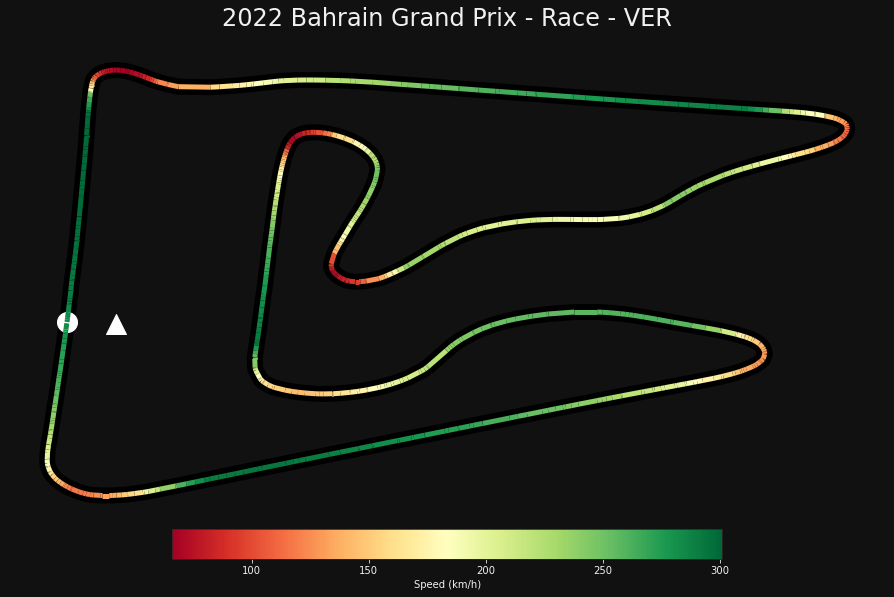

In [149]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(1100*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

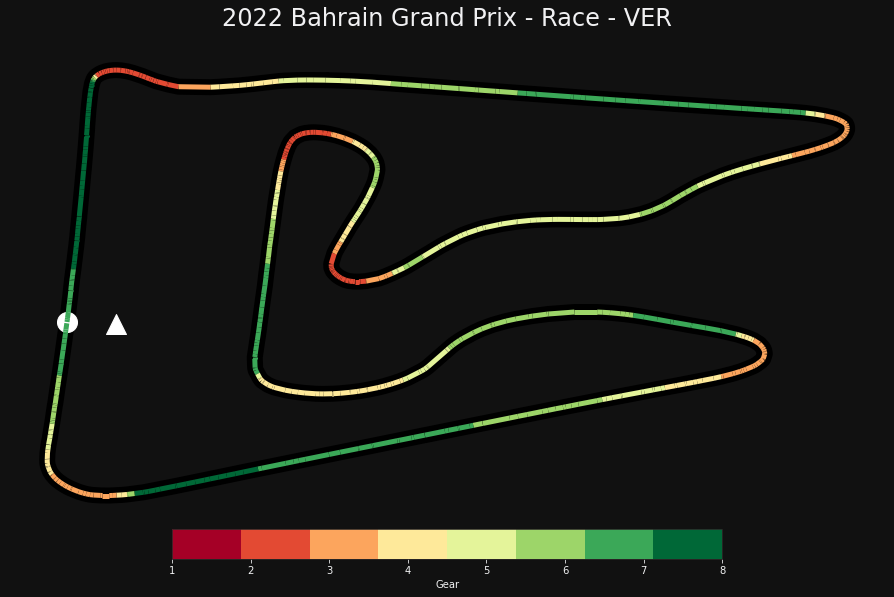

In [150]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(1100*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [151]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

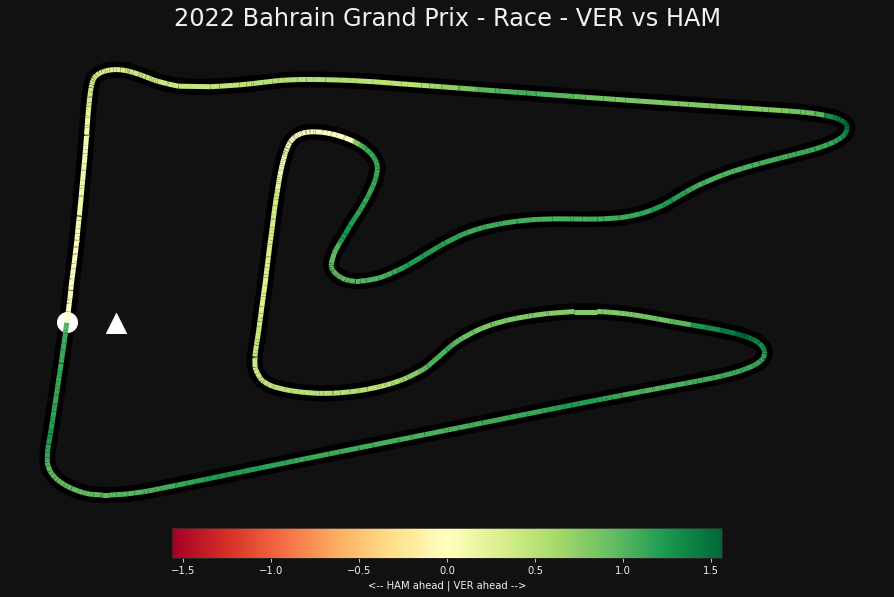

In [152]:
# Determine boundaries for the colorbar
vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(1100*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_2['X'], lap_2['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(vmin, vmax)
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(delta_time)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [153]:
race = session.laps
race.info()

<class 'fastf1.core.Laps'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1123 non-null   timedelta64[ns]
 1   DriverNumber        1123 non-null   object         
 2   LapTime             1098 non-null   timedelta64[ns]
 3   LapNumber           1123 non-null   int64          
 4   Stint               1123 non-null   int64          
 5   PitOutTime          78 non-null     timedelta64[ns]
 6   PitInTime           59 non-null     timedelta64[ns]
 7   Sector1Time         1101 non-null   timedelta64[ns]
 8   Sector2Time         1123 non-null   timedelta64[ns]
 9   Sector3Time         1123 non-null   timedelta64[ns]
 10  Sector1SessionTime  1101 non-null   timedelta64[ns]
 11  Sector2SessionTime  1123 non-null   timedelta64[ns]
 12  Sector3SessionTime  1123 non-null   timedelta64[ns]
 13  SpeedI1             891 non-null    float64 

In [154]:
race = race.sort_values('Time').reset_index(drop=True)
race.head(15)

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:04:14.256000,16,NaT,1,1,0 days 00:24:54.765000,NaT,NaT,0 days 00:00:42.120000,0 days 00:00:23.984000,NaT,0 days 01:03:50.298000,0 days 01:04:14.291000,224.0,251.0,273.0,250.0,False,SOFT,1.0,True,0 days 01:02:34.872000,Ferrari,LEC,1,False,2022-03-20 15:03:34.889
1,0 days 01:04:15.377000,1,NaT,1,1,0 days 00:21:32.991000,NaT,NaT,0 days 00:00:42.325000,0 days 00:00:24.389000,NaT,0 days 01:03:51.046000,0 days 01:04:15.427000,230.0,254.0,274.0,250.0,False,SOFT,4.0,False,0 days 01:02:34.872000,Red Bull Racing,VER,1,False,2022-03-20 15:03:34.889
2,0 days 01:04:16.123000,55,NaT,1,1,0 days 00:24:28.440000,NaT,NaT,0 days 00:00:42.889000,0 days 00:00:24.253000,NaT,0 days 01:03:51.952000,0 days 01:04:16.235000,227.0,251.0,276.0,254.0,False,SOFT,4.0,False,0 days 01:02:34.872000,Ferrari,SAI,1,False,2022-03-20 15:03:34.889
3,0 days 01:04:16.694000,44,NaT,1,1,0 days 00:25:37.972000,NaT,NaT,0 days 00:00:42.966000,0 days 00:00:24.137000,NaT,0 days 01:03:52.639000,0 days 01:04:16.785000,232.0,250.0,275.0,252.0,False,SOFT,3.0,False,0 days 01:02:34.872000,Mercedes,HAM,1,False,2022-03-20 15:03:34.889
4,0 days 01:04:17.503000,20,NaT,1,1,0 days 00:22:41.638000,NaT,NaT,0 days 00:00:43.366000,0 days 00:00:24.340000,NaT,0 days 01:03:53.229000,0 days 01:04:17.563000,233.0,246.0,277.0,260.0,False,SOFT,1.0,True,0 days 01:02:34.872000,Haas F1 Team,MAG,1,False,2022-03-20 15:03:34.889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0 days 01:04:22.740000,23,NaT,1,1,0 days 00:23:28.651000,NaT,NaT,0 days 00:00:46.031000,0 days 00:00:24.844000,NaT,0 days 01:03:58,0 days 01:04:22.772000,214.0,244.0,276.0,263.0,False,SOFT,1.0,True,0 days 01:02:34.872000,Williams,ALB,1,False,2022-03-20 15:03:34.889
11,0 days 01:04:23.237000,22,NaT,1,1,0 days 00:22:58.259000,NaT,NaT,0 days 00:00:45.990000,0 days 00:00:24.788000,NaT,0 days 01:03:58.560000,0 days 01:04:23.240000,222.0,249.0,276.0,267.0,False,SOFT,1.0,True,0 days 01:02:34.872000,AlphaTauri,TSU,1,False,2022-03-20 15:03:34.889
12,0 days 01:04:23.942000,47,NaT,1,1,0 days 00:23:34.102000,NaT,NaT,0 days 00:00:47.568000,0 days 00:00:24.968000,NaT,0 days 01:03:59.068000,0 days 01:04:24.062000,225.0,242.0,278.0,273.0,False,SOFT,1.0,True,0 days 01:02:34.872000,Haas F1 Team,MSC,1,False,2022-03-20 15:03:34.889
13,0 days 01:04:24.321000,77,NaT,1,1,0 days 00:24:06.735000,NaT,NaT,0 days 00:00:47.660000,0 days 00:00:25.013000,NaT,0 days 01:03:59.351000,0 days 01:04:24.389000,221.0,236.0,279.0,251.0,False,SOFT,4.0,False,0 days 01:02:34.872000,Alfa Romeo,BOT,1,False,2022-03-20 15:03:34.889


In [155]:
session.race_control_messages

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber
0,2022-03-20 14:20:01,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None
1,2022-03-20 14:30:01,Other,PIT EXIT CLOSED,None,None,None,NaN,None
2,2022-03-20 14:45:05,Other,RISK OF RAIN FOR F1 RACE IS 0%,None,None,None,NaN,None
3,2022-03-20 14:57:07,Drs,DRS DISABLED,DISABLED,None,None,NaN,None
4,2022-03-20 15:03:35,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None
...,...,...,...,...,...,...,...,...
55,2022-03-20 16:40:16,Flag,DOUBLE YELLOW IN TRACK SECTOR 1,None,DOUBLE YELLOW,Sector,1.0,None
56,2022-03-20 16:41:06,Flag,CHEQUERED FLAG,None,CHEQUERED,Track,NaN,None
57,2022-03-20 16:43:51,Flag,CLEAR IN TRACK SECTOR 2,None,CLEAR,Sector,2.0,None
58,2022-03-20 16:44:31,Flag,CLEAR IN TRACK SECTOR 1,None,CLEAR,Sector,1.0,None


In [156]:
results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:37:33.584000,Finished,26.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,3.0,NaT,NaT,NaT,0 days 01:37:39.182000,Finished,18.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,3.0,5.0,NaT,NaT,NaT,0 days 01:37:43.259000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,9.0,NaT,NaT,NaT,0 days 01:37:44.795000,Finished,12.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,5.0,7.0,NaT,NaT,NaT,0 days 01:37:48.338000,Finished,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,16.0,20.0,NaT,NaT,NaT,0 days 01:38:35.379000,Finished,0.0
27,27,N HULKENBERG,HUL,Aston Martin,2d826d,Nico,Hulkenberg,Nico Hulkenberg,17.0,17.0,NaT,NaT,NaT,0 days 01:38:37.413000,Finished,0.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,18.0,4.0,NaT,NaT,NaT,NaT,Engine,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,19.0,2.0,NaT,NaT,NaT,NaT,Steering,0.0


In [175]:
# driver_standings = pd.DataFrame(columns=['Abbreviation', 'TotalPoints'])
# driver_standings['Abbreviation'] = results['Abbreviation']
# driver_standings['TotalPoints'] = results['Points']
# driver_standings.to_csv('driver_standings.csv')

,Abbreviation,TotalPoints
16,LEC,26.0
55,SAI,18.0
44,HAM,15.0
63,RUS,12.0
20,MAG,10.0
...,...,...
6,LAT,0.0
27,HUL,0.0
11,PER,0.0
1,VER,0.0


# Tests

In [167]:
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [168]:
# Number of rounds so far
rounds = 7

# Initiate an empty dataframe to store our data
all_championship_standings = pd.DataFrame()

# We also want to store which driver drives for which team, which will help us later
driver_team_mapping = {}

# Initate a loop through all the rounds
for i in range(1, rounds + 1):
    # Make request to driverStandings endpoint for the current round
    race = ergast_retrieve(f'current/{i}/driverStandings')
    
    # Get the standings from the result
    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']
    
    # Initiate a dictionary to store the current rounds' standings in
    current_round = {'round': i}
    
    # Loop through all the drivers to collect their information
    for i in range(len(standings)):
        driver = standings[i]['Driver']['code']
        position = standings[i]['position']
        
        # Store the drivers' position
        current_round[driver] = int(position)
        
        # Create mapping for driver-team to be used for the coloring of the lines
        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']


    # Append the current round to our fial dataframe
    all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
    
# Set the round as the index of the dataframe
all_championship_standings = all_championship_standings.set_index('round')

In [172]:
all_championship_standings.fillna(21, inplace=True)
all_championship_standings['VET'] = all_championship_standings['VET'].astype(int)
all_championship_standings

,LEC,SAI,HAM,RUS,MAG,BOT,OCO,TSU,ALO,ZHO,MSC,STR,ALB,RIC,NOR,LAT,HUL,PER,VER,GAS,VET
round,,,,,,,,,,,,,,,,,,,,,
1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
2,1,2,5,4,8,9,6,11,13,14,15,16,18,19,10,20,17,7,3,12,21
3,1,3,5,2,9,10,7,13,14,15,17,18,16,11,8,20,19,4,6,12,21
4,1,5,7,4,10,8,9,12,15,16,19,18,17,11,6,21,20,3,2,13,14
5,1,5,6,4,10,8,9,12,16,18,19,17,15,11,7,21,20,3,2,13,14
6,2,5,6,4,10,8,9,11,15,18,19,17,16,12,7,21,20,3,1,13,14
7,2,5,6,4,10,8,9,12,13,18,19,17,16,11,7,21,20,3,1,14,15


In [174]:
# Melt data so it can be used as input for plot
all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])
all_championship_standings_melted

,round,variable,value
0,1,LEC,1
1,2,LEC,1
2,3,LEC,1
3,4,LEC,1
4,5,LEC,1
...,...,...,...
142,3,VET,21
143,4,VET,14
144,5,VET,14
145,6,VET,14


In [195]:
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for i in standings:
                if i['Driver']['code'] not in standings_dict:
                    standings_dict[i['Driver']['code']] = [i['points']]
                else:
                    standings_dict[i['Driver']['code']].append(i['points'])
        except IndexError:
            break
        
    return standings_dict


update_driver_standings(22)



{'LEC': ['26', '45', '71', '86', '104', '104', '116'],
 'SAI': ['18', '33', '33', '38', '53', '65', '83'],
 'HAM': ['15', '16', '28', '28', '36', '46', '50'],
 'RUS': ['12', '22', '37', '49', '59', '74', '84'],
 'MAG': ['10', '12', '12', '15', '15', '15', '15'],
 'BOT': ['8', '8', '12', '24', '30', '38', '40'],
 'OCO': ['6', '14', '20', '20', '24', '30', '30'],
 'TSU': ['4', '4', '4', '10', '10', '11', '11'],
 'ALO': ['2', '2', '2', '2', '2', '4', '10'],
 'ZHO': ['1', '1', '1', '1', '1', '1', '1'],
 'MSC': ['0', '0', '0', '0', '0', '0', '0'],
 'STR': ['0', '0', '0', '1', '2', '2', '2'],
 'ALB': ['0', '0', '1', '1', '3', '3', '3'],
 'RIC': ['0', '0', '8', '11', '11', '11', '11'],
 'NOR': ['0', '6', '16', '35', '35', '39', '48'],
 'LAT': ['0', '0', '0', '0', '0', '0', '0'],
 'HUL': ['0', '0', '0', '0', '0', '0', '0'],
 'PER': ['0', '12', '30', '54', '66', '85', '110'],
 'VER': ['0', '25', '25', '59', '85', '110', '125'],
 'GAS': ['0', '4', '6', '6', '6', '6', '6'],
 'VET': ['0', '4', '4'